In [147]:
import pandas as pd
import matplotlib.pyplot as plt



In [148]:
df = pd.read_csv('C:\Files\he.csv')

There is a Custom Segment with hundreds of different categories which can be used to get more insights so I am going to acquire
them and add them to the main category.

In [149]:
other_segment = df.loc[df['Segment Type'] == 'Custom', ['Segment Description', 'Answer', 'Count', 'Percentage' ]]

Getting the Questions and Answers of the custome segments to different columns

In [150]:
other_segment.loc[~other_segment['Segment Description'].str.contains('\?')]['Segment Description'].unique()

array(['guys, 5\'5" girls) Tall',
       'guys, 5\'5" girls) Medium (± 3 inches)',
       'guys, 5\'5" girls) Short', 'Graduation Year 2017',
       'Graduation Year 2018', 'Graduation Year 2019',
       'Graduation Year 2020'], dtype=object)

In [151]:
other_segment['Segment Description Question'] = other_segment['Segment Description'].apply(lambda x: x[:x.find('?') + 1] if '?' in x else (x[:x.find(')')] if ')' in x else ('Graduation Year' if 'Graduation Year' in x else x)))
other_segment['Segment Description Answer'] = other_segment['Segment Description'].apply(lambda x: x[x.find('?') + 1:] if '?' in x else (x[x.find(')') + 1:] if ')' in x else (x[-4:] if 'Graduation Year' in x else x)))
other_segment

Segment Description     Answer  Count  \
890                              guys, 5'5" girls) Tall   Facebook     54   
891                              guys, 5'5" girls) Tall  Instagram     96   
892                              guys, 5'5" girls) Tall   Snapchat      7   
893                              guys, 5'5" girls) Tall    Twitter     17   
894                              guys, 5'5" girls) Tall        NaN    120   
895               guys, 5'5" girls) Medium (± 3 inches)   Facebook     95   
896               guys, 5'5" girls) Medium (± 3 inches)  Instagram    174   
897               guys, 5'5" girls) Medium (± 3 inches)   Snapchat     17   
898               guys, 5'5" girls) Medium (± 3 inches)    Twitter     52   
899               guys, 5'5" girls) Medium (± 3 inches)        NaN    283   
900                             guys, 5'5" girls) Short   Facebook     40   
901                             guys, 5'5" girls) Short  Instagram     76   
902                             guys, 5'5" girls) Short   Snapchat      9   
903                             guys, 5'5" girls) Short    Twitter     21   
904                             guys, 5'5" girls) Short        NaN     76   
905                          or private school? Private   Facebook     61   
906                          or private school? Private  Instagram    105   
907                          or private school? Private   Snapchat      8   
908                          or private school? Private    Twitter     20   
909                          or private school? Private        NaN    168   
910                    games a lot? Yes, console mostly   Facebook     20   
911                    games a lot? Yes, console mostly  Instagram     37   
912                    games a lot? Yes, console mostly   Snapchat      8   
913                    games a lot? Yes, console mostly    Twitter     22   
914                    games a lot? Yes, console mostly        NaN     61   
915            your parents make? Upper class (> $240K)   Facebook     70   
916            your parents make? Upper class (> $240K)  Instagram     83   
917            your parents make? Upper class (> $240K)   Snapchat      8   
918            your parents make? Upper class (> $240K)    Twitter     13   
919            your parents make? Upper class (> $240K)        NaN    130   
920       your parents make? Upper-middle class (~$160K   Facebook     71   
921       your parents make? Upper-middle class (~$160K  Instagram    149   
922       your parents make? Upper-middle class (~$160K   Snapchat     11   
923       your parents make? Upper-middle class (~$160K    Twitter     42   
924       your parents make? Upper-middle class (~$160K        NaN    178   
925   your parents make? Middle / lower-middle class...   Facebook     41   
926   your parents make? Middle / lower-middle class...  Instagram    111   
927   your parents make? Middle / lower-middle class...   Snapchat     12   
928   your parents make? Middle / lower-middle class...    Twitter     32   
929   your parents make? Middle / lower-middle class...        NaN    144   
930                 your parents make? Poor (< ~$50K) 😁   Facebook     15   
931                 your parents make? Poor (< ~$50K) 😁  Instagram     45   
932                 your parents make? Poor (< ~$50K) 😁   Snapchat      7   
933                 your parents make? Poor (< ~$50K) 😁    Twitter     10   
934                 your parents make? Poor (< ~$50K) 😁        NaN     57   
935             What's your major? ME/EE/other engineer   Facebook     40   
936             What's your major? ME/EE/other engineer  Instagram     47   
937             What's your major? ME/EE/other engineer   Snapchat      8   
938             What's your major? ME/EE/other engineer    Twitter     14   
939             What's your major? ME/EE/other engineer        NaN    110   
940                        or private school? No school   Facebook      4   
941                        or pr

Rephrasing the questions so that I can catgorize throught them later

In [152]:
conditions_dict = {
    lambda x: x == 'guys, 5\'5\" girls'  : 'Height',
    lambda x: x == 'or private school?': 'Education',
    lambda x:  x == 'games a lot?': 'Gamer',
    lambda x:  x == 'Are you a?': 'Extracurriculars',
    lambda x:  x == 'you a feminist?'  : 'Feminist',
    lambda x:  x == 'Are you single?'  : 'Is Single',
    lambda x:  x == 'you a virgin?'  : 'Is Virgin',
    lambda x:  x == 'you vote for?' : 'Voted For',
    lambda x:  x == 'closely identify as?'  : 'Indentifies race as',
    lambda x:  x == 'Are you?': 'Religion',
    lambda x:  x == 'Sexual orientation?'  : 'Sexual orientation',
    lambda x:  x == 'in Greek life?': 'Greek life affliction',
    lambda x:  x == 'your zodiac sign?'  : 'Zodiac sign',
    lambda x:  x == 'grow up speaking?'  : 'Native Language',
    lambda x:  x == 'have a job?': 'Job Status',
    lambda x:  x == 'are you pursuing?'  : 'pursuing subject',
    lambda x:  x == 'What\'s your leaning?'  : 'Political Stance',
    lambda x:  x == 'clubs / organizations?'  : 'Organizations',
    lambda x:  x == 'I\'m in?'  : 'Education',
    lambda x:  x == 'What\'s your GPA?'  : 'GPA',
    lambda x:  x == 'What\'s your major?'  : 'Major',
    lambda x:  x == 'do per month?'  : 'Monthly Activity',
    lambda x:  x == 'your parents make?'  : 'Parents Income',   
}

other_segment['Question'] = other_segment['Segment Description Question'].apply(lambda y:next((output for condition, output in conditions_dict.items() if condition(y)), y))

In [153]:
other_segment

Segment Description     Answer  Count  \
890                              guys, 5'5" girls) Tall   Facebook     54   
891                              guys, 5'5" girls) Tall  Instagram     96   
892                              guys, 5'5" girls) Tall   Snapchat      7   
893                              guys, 5'5" girls) Tall    Twitter     17   
894                              guys, 5'5" girls) Tall        NaN    120   
895               guys, 5'5" girls) Medium (± 3 inches)   Facebook     95   
896               guys, 5'5" girls) Medium (± 3 inches)  Instagram    174   
897               guys, 5'5" girls) Medium (± 3 inches)   Snapchat     17   
898               guys, 5'5" girls) Medium (± 3 inches)    Twitter     52   
899               guys, 5'5" girls) Medium (± 3 inches)        NaN    283   
900                             guys, 5'5" girls) Short   Facebook     40   
901                             guys, 5'5" girls) Short  Instagram     76   
902                             guys, 5'5" girls) Short   Snapchat      9   
903                             guys, 5'5" girls) Short    Twitter     21   
904                             guys, 5'5" girls) Short        NaN     76   
905                          or private school? Private   Facebook     61   
906                          or private school? Private  Instagram    105   
907                          or private school? Private   Snapchat      8   
908                          or private school? Private    Twitter     20   
909                          or private school? Private        NaN    168   
910                    games a lot? Yes, console mostly   Facebook     20   
911                    games a lot? Yes, console mostly  Instagram     37   
912                    games a lot? Yes, console mostly   Snapchat      8   
913                    games a lot? Yes, console mostly    Twitter     22   
914                    games a lot? Yes, console mostly        NaN     61   
915            your parents make? Upper class (> $240K)   Facebook     70   
916            your parents make? Upper class (> $240K)  Instagram     83   
917            your parents make? Upper class (> $240K)   Snapchat      8   
918            your parents make? Upper class (> $240K)    Twitter     13   
919            your parents make? Upper class (> $240K)        NaN    130   
920       your parents make? Upper-middle class (~$160K   Facebook     71   
921       your parents make? Upper-middle class (~$160K  Instagram    149   
922       your parents make? Upper-middle class (~$160K   Snapchat     11   
923       your parents make? Upper-middle class (~$160K    Twitter     42   
924       your parents make? Upper-middle class (~$160K        NaN    178   
925   your parents make? Middle / lower-middle class...   Facebook     41   
926   your parents make? Middle / lower-middle class...  Instagram    111   
927   your parents make? Middle / lower-middle class...   Snapchat     12   
928   your parents make? Middle / lower-middle class...    Twitter     32   
929   your parents make? Middle / lower-middle class...        NaN    144   
930                 your parents make? Poor (< ~$50K) 😁   Facebook     15   
931                 your parents make? Poor (< ~$50K) 😁  Instagram     45   
932                 your parents make? Poor (< ~$50K) 😁   Snapchat      7   
933                 your parents make? Poor (< ~$50K) 😁    Twitter     10   
934                 your parents make? Poor (< ~$50K) 😁        NaN     57   
935             What's your major? ME/EE/other engineer   Facebook     40   
936             What's your major? ME/EE/other engineer  Instagram     47   
937             What's your major? ME/EE/other engineer   Snapchat      8   
938             What's your major? ME/EE/other engineer    Twitter     14   
939             What's your major? ME/EE/other engineer        NaN    110   
940                        or private school? No school   Facebook      4   
941                        or pr

In [154]:
other_segment.rename(columns={'Segment Description Answer': 'Type_Answer'}, inplace= True)
other_segment['Type_Answer'] = other_segment['Type_Answer'].str.replace('[🔷🐘😁🐧🖥💻😇😏]', '', regex=True)
other_segment.groupby(['Question','Type_Answer'])['Count'].sum()


Question               Type_Answer                         
Education               College                                2325
                        Grad School                              41
                        High School                             277
                        No school                                32
                        Other                                    19
                        Post-grad                                95
                        Private                                 362
                        Public                                  767
Extracurriculars        SVB team member                           0
                        Student Trekker                           1
Feminist                No                                      286
                        Yes                                     204
GPA                     1.0 to 2.0                               33
                        2.0 to 3.0                      

Rephrasin the answers and some of the questions too in order to finalize it.

In [155]:
conditions_dict_questions = {
    lambda x: 'Zodiac sign' in x['Question']  : lambda x: x['Type_Answer'][:x['Type_Answer'].find('(')],
    lambda x: '(± 3 inches)' in x['Type_Answer']  : lambda x: x['Type_Answer'][:x['Type_Answer'].find('(')],
    lambda x: 'Job Status' in x['Question'] and 'Yes' not in x['Type_Answer'] and 'No' in x['Type_Answer']  : lambda x: 'No, searching',
    lambda x: 'Job Status' in x['Question'] and 'Yes' not in x['Type_Answer'] and 'Nope' in x['Type_Answer']  : lambda x: 'No, not looking',
    lambda x: ('GPA' in x['Question'] and 'to' in x['Type_Answer']) : lambda x: x['Type_Answer'].replace(' to ', '-'),
    lambda x: ('GPA' in x['Question'] and 'Above ' in x['Type_Answer'] or 'Below ' in x['Type_Answer']) : lambda x: x['Type_Answer'][-4:],
    lambda x: ('Gamer' in x['Question'] and 'Yes, ' in x['Type_Answer']) : lambda x: x['Type_Answer'][6:-7],
    lambda x: 'Comp sci' in x['Type_Answer']  : lambda x: 'Computer Science',
    lambda x: 'Private' in x['Type_Answer']  : lambda x: 'Private School',
    lambda x: 'Comm / marketing' in x['Type_Answer']  : lambda x: 'Communications / marketing',
    lambda x: 'Some other language (comment' in x['Type_Answer']  : lambda x: 'Other',
    lambda x: ('Organizations' in x['Question'] and 'No' not in x['Type_Answer']) : lambda x: x['Type_Answer'][2:8].title() if 'More' not in x['Type_Answer'] else 'Multiple Majors',
    lambda x: 'Parents Income' in x['Question']  : lambda x: x['Type_Answer'][:x['Type_Answer'].find('(') - 1] if ' / ' not in x['Type_Answer'] else 'Middle or lower-middle class',
    lambda x: ('Extracurriculars' in x['Question'])  : lambda x: x['Type_Answer'],
    lambda x: ('Writing in Bernie' in x['Type_Answer'])  : lambda x: 'Bernie Sanders'


}
other_segment['Type_Answer_'] = other_segment.apply(lambda y:next((output(y) for condition, output in conditions_dict_questions.items() if condition(y)), y['Type_Answer']), axis=1)
other_segment

Segment Description     Answer  Count  \
890                              guys, 5'5" girls) Tall   Facebook     54   
891                              guys, 5'5" girls) Tall  Instagram     96   
892                              guys, 5'5" girls) Tall   Snapchat      7   
893                              guys, 5'5" girls) Tall    Twitter     17   
894                              guys, 5'5" girls) Tall        NaN    120   
895               guys, 5'5" girls) Medium (± 3 inches)   Facebook     95   
896               guys, 5'5" girls) Medium (± 3 inches)  Instagram    174   
897               guys, 5'5" girls) Medium (± 3 inches)   Snapchat     17   
898               guys, 5'5" girls) Medium (± 3 inches)    Twitter     52   
899               guys, 5'5" girls) Medium (± 3 inches)        NaN    283   
900                             guys, 5'5" girls) Short   Facebook     40   
901                             guys, 5'5" girls) Short  Instagram     76   
902                             guys, 5'5" girls) Short   Snapchat      9   
903                             guys, 5'5" girls) Short    Twitter     21   
904                             guys, 5'5" girls) Short        NaN     76   
905                          or private school? Private   Facebook     61   
906                          or private school? Private  Instagram    105   
907                          or private school? Private   Snapchat      8   
908                          or private school? Private    Twitter     20   
909                          or private school? Private        NaN    168   
910                    games a lot? Yes, console mostly   Facebook     20   
911                    games a lot? Yes, console mostly  Instagram     37   
912                    games a lot? Yes, console mostly   Snapchat      8   
913                    games a lot? Yes, console mostly    Twitter     22   
914                    games a lot? Yes, console mostly        NaN     61   
915            your parents make? Upper class (> $240K)   Facebook     70   
916            your parents make? Upper class (> $240K)  Instagram     83   
917            your parents make? Upper class (> $240K)   Snapchat      8   
918            your parents make? Upper class (> $240K)    Twitter     13   
919            your parents make? Upper class (> $240K)        NaN    130   
920       your parents make? Upper-middle class (~$160K   Facebook     71   
921       your parents make? Upper-middle class (~$160K  Instagram    149   
922       your parents make? Upper-middle class (~$160K   Snapchat     11   
923       your parents make? Upper-middle class (~$160K    Twitter     42   
924       your parents make? Upper-middle class (~$160K        NaN    178   
925   your parents make? Middle / lower-middle class...   Facebook     41   
926   your parents make? Middle / lower-middle class...  Instagram    111   
927   your parents make? Middle / lower-middle class...   Snapchat     12   
928   your parents make? Middle / lower-middle class...    Twitter     32   
929   your parents make? Middle / lower-middle class...        NaN    144   
930                 your parents make? Poor (< ~$50K) 😁   Facebook     15   
931                 your parents make? Poor (< ~$50K) 😁  Instagram     45   
932                 your parents make? Poor (< ~$50K) 😁   Snapchat      7   
933                 your parents make? Poor (< ~$50K) 😁    Twitter     10   
934                 your parents make? Poor (< ~$50K) 😁        NaN     57   
935             What's your major? ME/EE/other engineer   Facebook     40   
936             What's your major? ME/EE/other engineer  Instagram     47   
937             What's your major? ME/EE/other engineer   Snapchat      8   
938             What's your major? ME/EE/other engineer    Twitter     14   
939             What's your major? ME/EE/other engineer        NaN    110   
940                        or private school? No school   Facebook      4   
941                        or pr

Some Additional Cleaning

In [156]:
other_segment = other_segment[['Question', 'Type_Answer_', 'Answer','Count', 'Percentage']]
df.drop(columns='Question', inplace=True)
df = df.loc[df['Segment Type']!='Custom']

In [157]:
df.rename(columns={'Segment Type': 'Question','Answer': 'Social Media', 'Segment Description' : 'Response'}, inplace=True)
other_segment.rename(columns={'Type_Answer_': 'Response', 'Answer' : 'Social Media'}, inplace=True)
df = pd.concat([df, other_segment])

C:\Users\Syfe\AppData\Local\Temp\ipykernel_15292\660716843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_segment.rename(columns={'Type_Answer_': 'Response', 'Answer' : 'Social Media'}, inplace=True)


In [158]:
df = df.loc[df['Question']!='Web']
df = df.loc[df['Question']!='Extracurriculars']
df['Response'] = df['Response'].str.strip('!')
df = df[['Question', 'Response', 'Social Media', 'Count']]

In [159]:
df['Social Media'].fillna('Doesn\'t use', inplace=True)

i excluded some universities where it was just 1 respondent

In [160]:
Unnecessary_Uni = df.loc[(df['Question'] == 'University') & (df['Count'] == 0)].groupby(['Response'])['Count'].max().index.tolist()
df = df.loc[~df['Response'].isin(Unnecessary_Uni)]
df['Question'] = df['Question'].apply(lambda x: 'Education' if x == 'University' else x)
df.rename(columns={'Question': 'Primary','Response': 'Secondary'}, inplace=True)
df.iloc[:,1] = df.iloc[:,1].str.strip()
df.iloc[:,0] = df.iloc[:,0].str.strip()
df['sum'] = df.groupby(['Primary', 'Secondary'])['Count'].transform('sum')
doesnt_use = df.groupby(['Primary', 'Secondary']).tail(1)
doesnt_use.loc[:,['Doesn\'t Use']] = doesnt_use['Count']
doesnt_use

Primary                           Secondary Social Media  \
4                    Mobile                      Global results  Doesn't use   
14                   Gender                       Female voters  Doesn't use   
19                   Gender                         Male voters  Doesn't use   
229               Education                    Emory University  Doesn't use   
404               Education         College of William and Mary  Doesn't use   
439               Education               University of Arizona  Doesn't use   
459               Education             Northwestern University  Doesn't use   
469               Education              University of Michigan  Doesn't use   
479               Education                  Cornell University  Doesn't use   
504               Education           Claremont McKenna College  Doesn't use   
534               Education              University of Virginia  Doesn't use   
554               Education     University of Wisconsin-Madison  Doesn't use   
569               Education          San Diego State University  Doesn't use   
584               Education                  Indiana University  Doesn't use   
589               Education  University of California, Berkeley  Doesn't use   
599               Education          Texas Christian University  Doesn't use   
604               Education             Truman State University  Doesn't use   
609               Education              University of Illinois  Doesn't use   
614               Education            University of Washington  Doesn't use   
619               Education        University of North Carolina  Doesn't use   
684               Education                Texas A&M University  Doesn't use   
894                  Height                                Tall  Doesn't use   
899                  Height                              Medium  Doesn't use   
904                  Height                               Short  Doesn't use   
909               Education                      Private School  Doesn't use   
914                   Gamer                             console  Doesn't use   
919          Parents Income                         Upper class  Doesn't use   
924          Parents Income                  Upper-middle class  Doesn't use   
929          Parents Income        Middle or lower-middle class  Doesn't use   
934          Parents Income                                Poor  Doesn't use   
939                   Major                ME/EE/other engineer  Doesn't use   
944               Education                           No school  Doesn't use   
949               Education                              Public  Doesn't use   
954               Voted For                        Donald Trump  Doesn't use   
959               Voted For                     Hillary Clinton  Doesn't use   
964                   Major               Business/Econ/Finance  Doesn't use   
969                   Major                             Pre-med  Doesn't use   
974     Indentifies race as                               Asian  Doesn't use   
979                Religion                          None/Other  Doesn't use   
984                Religion                              Jewish  Doesn't use   
999                Feminist                                  No  Doesn't use   
1004               Feminist                                 Yes  Doesn't use   
1009              Is Single                                  No  Doesn't use   
1014              Is Single                                 Yes  Doesn't use   
1019     student loan debt?                                  No  Doesn't use   
1024     student loan debt?                                 Yes  Doesn't use   
1029              Is Virgin                                  No  Doesn't use   
1034              Is Virgin                                 Yes  Doesn't use   
1039              Voted For                         Didn't vote  Doesn't use   
1044              Vo

In [161]:
df = df.merge(doesnt_use[['Primary','Secondary', 'Doesn\'t Use']], on=['Primary', 'Secondary'], how='left')
Uses_more = df.loc[df.groupby(['Primary', 'Secondary'])['Count'].idxmax()]
Uses_more = Uses_more.iloc[:,[0,1,2,3]]
df = pd.merge(df, Uses_more, on=['Primary', 'Secondary'], suffixes=('', ' Highest Type'))

Creating Index to easily check stats

In [162]:
reference = df.groupby(['Primary', 'Secondary'])['Count'].mean()
reference = pd.DataFrame(reference.index.tolist())
reference.rename(columns={0:'Group', 1:'Sub_Group'}, inplace= True)
reference = reference.sort_values(by=['Group', 'Sub_Group'], ascending= False)
index = pd.DataFrame(reference.groupby('Group')['Sub_Group'].apply(list))
index

Sub_Group
Group                                                                   
Education              [University of Wisconsin-Madison, University o...
Feminist                                                       [Yes, No]
GPA                                [4.0, 3.0-4.0, 2.0-3.0, 1.0-2.0, 1.0]
Gamer                                          [mobile, console, PC, No]
Gender                                      [Male voters, Female voters]
Graduation Year                                 [2020, 2019, 2018, 2017]
Greek life affliction  [Yes but regretting it, Yes, No but I wanna be...
Height                                             [Tall, Short, Medium]
Indentifies race as    [White, Other, Native American, Hispanic, Blac...
Is Single                                                      [Yes, No]
Is Virgin                                                      [Yes, No]
Job Status               [Yes, part-time, Yes, full-time, No, searching]
Mac or PC?                                              [PC, Other, Mac]
Major                  [Visual/performing arts, Pre-med, Political sc...
Mobile                                                  [Global results]
Monthly Activity       [Realistically, none, More than 10 hours, Less...
Native Language                          [Spanish, Other, English, Both]
Organizations                        [No, Multiple Majors, Minor, Major]
Parents Income         [Upper-middle class, Upper class, Poor, Middle...
Political Stance                     [Liberal, In-between, Conservative]
Religion                         [None/Other, Muslim, Jewish, Christian]
Sexual orientation                         [Straight, Gay, Confused, Bi]
Voted For              [Other, Jill Stein, Hillary Clinton, Gary John...
Zodiac sign            [Virgo, Taurus, Scorpio, Sagittarius, Pisces, ...
pursuing subject        [Undecided, Technical / engineering, Humanities]
student loan debt?                                             [Yes, No]

Creating some addtional metrics I use later like second highest platform of each subgroup, percentages, etc.

In [163]:
second_highest = df.groupby(['Primary','Secondary', ]).apply(lambda x: x.nlargest(2, 'Count').iloc[1] if (x['Social Media Highest Type'] == 'Doesn\'t use').all() else x[0:3].nlargest(2, 'Count').iloc[1])
second_highest = second_highest[['Primary','Secondary', 'Social Media', 'Count']].reset_index(drop=True)
df = pd.merge(df, second_highest, on= ['Primary','Secondary'], how='left', suffixes=( '',' 2nd Highest Type'))

In [164]:
df['Users %'] = (df['Count'] * 100 / df['sum']).round(2)
df['Users Highest Type %'] = (df['Count Highest Type'] * 100 / df['sum']).round(2)
df['Users 2nd Highest Type %'] = (df['Count 2nd Highest Type'] * 100 / df['sum']).round(2)
df['Doesn\'t Use'] = (df['Doesn\'t Use'] * 100 / df['sum']).round(2)                                               

In [165]:
old_names = ['Primary', 'Secondary', 'Social Media', 'Count', 'sum', 'Doesn\'t Use',
       'Social Media Highest Type', 'Count Highest Type',
       'Social Media 2nd Highest Type', 'Count 2nd Highest Type', 'Users %',
       'Users Highest Type %', 'Users 2nd Highest Type %']
changed_names = ['Primary Category', 'Secondary Category', 'Social Media', 'User Count', 'Total', 'Doesn\'t Use %',
       'Social Media Highest Used', 'Count Highest Used',
       'Social Media 2nd Highest Used', 'Count 2nd Highest Used', 'Users %',
       'Users Highest Used %', 'Users 2nd Highest Used %']

df.rename(columns={old_name:changed_name for old_name, changed_name in zip(old_names, changed_names)}, inplace=True)


In [166]:
df = df[['Primary Category', 'Secondary Category', 'Social Media', 'User Count', 'Total', 'Users %',  
       'Social Media Highest Used', 'Social Media 2nd Highest Used','Users Highest Used %','Count Highest Used',  'Users 2nd Highest Used %', 'Count 2nd Highest Used', 'Doesn\'t Use %']]

Shortening the Column names for ease of use in chart-making

In [167]:
prim = 'Primary Category' 
sec = 'Secondary Category'
soc = 'Social Media'
total = 'Users %'

Now for the comparisons

Top groups with the highest users of a specific platform.

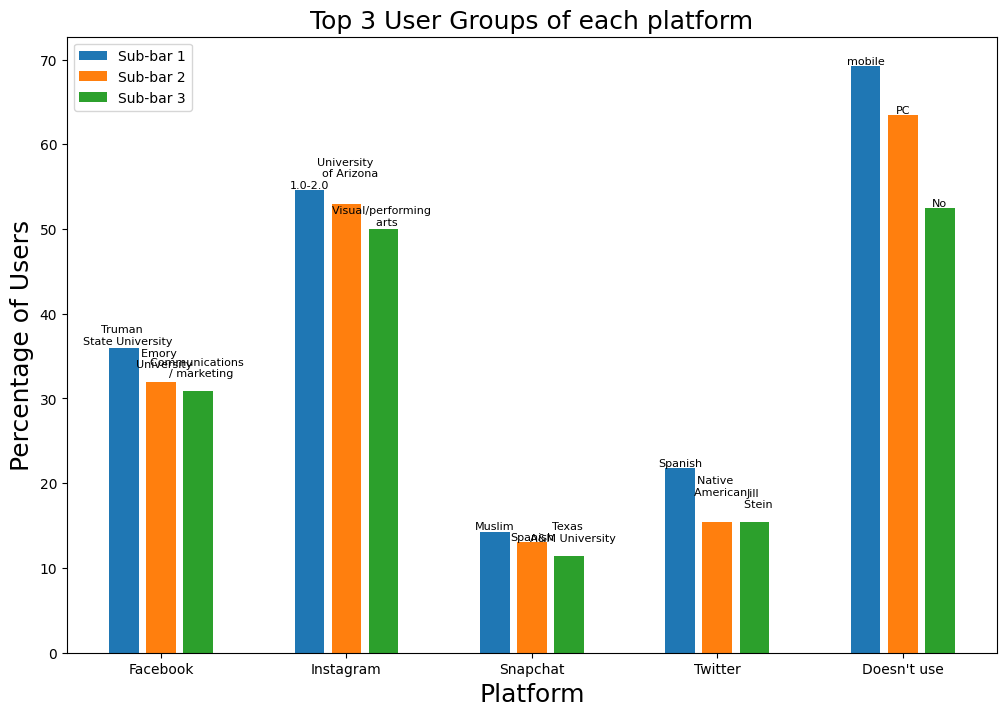

In [168]:
import random
import numpy as np
counts_list = []
countries_list = []
categories = df[soc].unique()
for platform in categories:
    filter = df[soc] == platform
    top = df.loc[filter].nlargest(3, total)
    counts_list.append(top[total])
    countries_list.append(top[sec])

data = np.array(counts_list).T
countries = np.array(countries_list).T
width = 0.2

fig, ax = plt.subplots(figsize=(12,8))
text_size = 8

for i in range(data.shape[0]):
    x_positions = np.arange(len(categories)) + i * width
    ax.bar(x_positions, data[i], width=width - 0.04, label=f'Sub-bar {i + 1}')
    l_pre = 0

    for j, (datum, country) in enumerate(zip(data[i], countries[i])):
        text = str(country)
        l = len(text)
        h = random.choices([0.2,1.5,3], k = 1)                
        height = datum    
        if  (l > 9) & (l % 2 == 0) :
            height = datum + ( h)
            sp = text.find(' ')
            text_ = f'{text[:sp]} \n {text[sp:]}'                               
            ax.text(x_positions[j], height, text_ , ha='center', va='bottom', fontsize=text_size)
        elif (l > 9) &( l % 2 != 0):
            sp = text.find(' ')
            height = datum + (1 * h)
            half = int(l/2 + .5)                
            text_ = f'{text[:sp]} \n {text[sp:]}'                
            ax.text(x_positions[j] , height  , text_ , ha='center', va='bottom', fontsize=text_size)           
        else:     
            ax.text(x_positions[j] , height  ,  str(country), ha='center', va='bottom', fontsize=text_size)

ax.set_xticks(np.arange(len(categories)) + (data.shape[0] - 1) * width / 2)
ax.set_xticklabels(categories)
ax.legend()
plt.title('Top 3 User Groups of each platform', fontsize='18')
plt.xlabel('Platform', fontsize='18')
plt.ylabel('Percentage of Users', fontsize='18')

plt.show()

Making a dedicated filter to check each group

In [169]:
filter = df[soc] == 'Facebook'
largest = df.loc[filter].nlargest(10, total)[sec].tolist()
largest = df.loc[df[sec].isin(largest)]

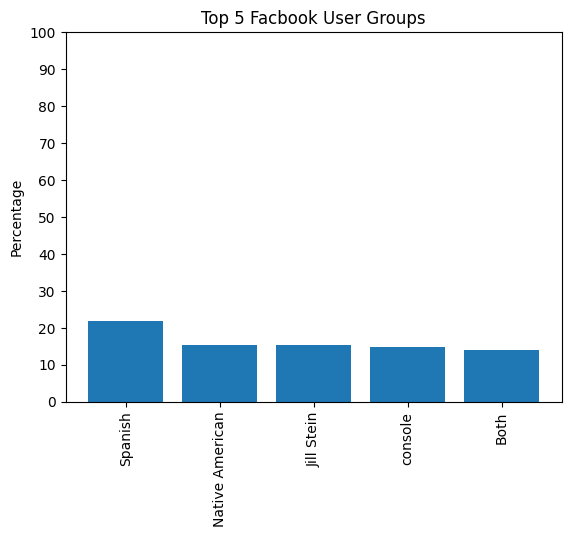

In [170]:
filter = df[soc] == 'Twitter'
largest = df.loc[filter].nlargest(5, total)
plt.bar(largest[sec], largest[total], width= 0.8)
plt.xticks(rotation=90)
plt.title('Top 5 Facbook User Groups')
plt.ylabel('Percentage')
plt.yticks([x for x in range(0, 101,10)])
plt.show()

In [171]:
index

Sub_Group
Group                                                                   
Education              [University of Wisconsin-Madison, University o...
Feminist                                                       [Yes, No]
GPA                                [4.0, 3.0-4.0, 2.0-3.0, 1.0-2.0, 1.0]
Gamer                                          [mobile, console, PC, No]
Gender                                      [Male voters, Female voters]
Graduation Year                                 [2020, 2019, 2018, 2017]
Greek life affliction  [Yes but regretting it, Yes, No but I wanna be...
Height                                             [Tall, Short, Medium]
Indentifies race as    [White, Other, Native American, Hispanic, Blac...
Is Single                                                      [Yes, No]
Is Virgin                                                      [Yes, No]
Job Status               [Yes, part-time, Yes, full-time, No, searching]
Mac or PC?                                              [PC, Other, Mac]
Major                  [Visual/performing arts, Pre-med, Political sc...
Mobile                                                  [Global results]
Monthly Activity       [Realistically, none, More than 10 hours, Less...
Native Language                          [Spanish, Other, English, Both]
Organizations                        [No, Multiple Majors, Minor, Major]
Parents Income         [Upper-middle class, Upper class, Poor, Middle...
Political Stance                     [Liberal, In-between, Conservative]
Religion                         [None/Other, Muslim, Jewish, Christian]
Sexual orientation                         [Straight, Gay, Confused, Bi]
Voted For              [Other, Jill Stein, Hillary Clinton, Gary John...
Zodiac sign            [Virgo, Taurus, Scorpio, Sagittarius, Pisces, ...
pursuing subject        [Undecided, Technical / engineering, Humanities]
student loan debt?                                             [Yes, No]

Looking at different users by Primary Category

In [178]:

primary_category ='Education' # Enter Group Here


social_media = df['Social Media'].unique()
plt.figure(figsize=(15, 6), dpi=800)
for socialmedia in social_media:      
    filt = (df['Primary Category'] == primary_category) & (df['Social Media'] == socialmedia)
    df_soc = df[filt].sort_values(by='Secondary Category')
    plt.plot(df_soc['Secondary Category'], df_soc['Users %'], label = socialmedia)    
plt.legend()
plt.ylabel('Percentage of users')
plt.xlabel('Sub-groups')
if len(df_soc['Secondary Category']) > 8:
    plt.xticks(rotation=90)
plt.title(f' Social Media Use by different sub-groups within Group: {primary_category}')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.3)


Looking at the different platforms by group OR subgroup

Text(0, 0.5, 'Percentage of Users')

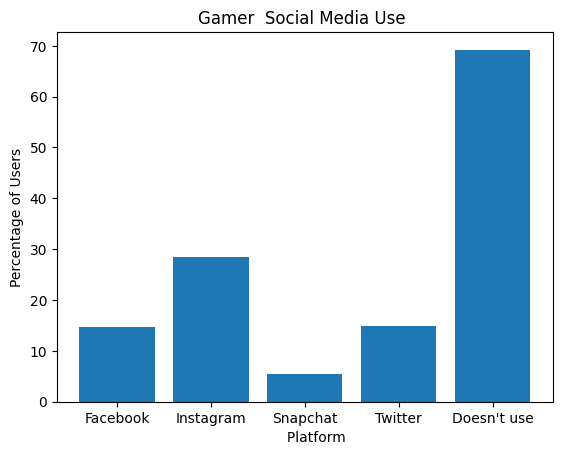

In [173]:

Group = 'Gamer'  
SubGroup = ''

Sub_Group_reference = df.iloc[:,1]
Group_reference = df.iloc[:,0]

if Group == '' and SubGroup != '':
    filt = (Sub_Group_reference == SubGroup)
elif Group != '' and SubGroup == '':
    filt = (Group_reference == Group)
elif Group != '' and SubGroup != '':
    filt = (Sub_Group_reference == SubGroup) & (Group_reference == Group)

plt.bar(
    df.loc[filt].iloc[:,2],df.loc[filt][total],
label = SubGroup)

plt.title(f'{Group} {SubGroup} Social Media Use ')
plt.xlabel(f'     Platform')
plt.ylabel(f'Percentage of Users')

Showing Use of a specific platform vs other platforms.

<function matplotlib.pyplot.show(close=None, block=None)>

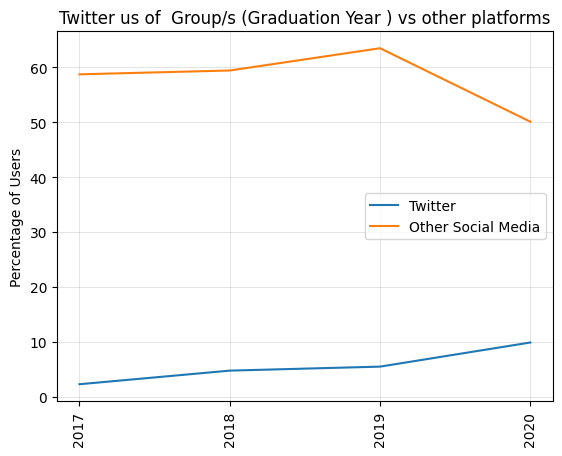

In [186]:

platform = 'Twitter' #Enter Platform Here
group = ['Graduation Year']
groups = ''
for i in group:
    if len(group) ==1:
        groups = groups + (f'{i} ')
    else:
        groups = groups + (f'{i}, ')
filt = df[soc] == platform
df_platform = df.loc[filt]
df_platform.loc[:,[f'Not {platform}']] = 100 - (df_platform[total] +df_platform['Doesn\'t Use %'])

df_platform = pd.merge(df_platform.iloc[:, [0,1,-1]], df, on = [prim, sec], how='left')
filt = (df_platform[prim].isin(group) & (df_platform[soc] == platform))
df_platform = df_platform.loc[filt].sort_values(by=[prim, sec])
if len(df_platform[sec]) > 8:
    plt.figure(figsize=(18, 6), dpi=80)
    
plt.plot(df_platform[sec], df_platform[total], label= platform)
plt.plot(df_platform[sec], df_platform[f'Not {platform}'], label='Other Social Media')

plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.3)
plt.xticks( rotation=90)
plt.ylabel('Percentage of Users')
plt.legend()
plt.title(f'{platform} us of  Group/s ({groups}) vs other platforms')

plt.show


In [175]:
index

Sub_Group
Group                                                                   
Education              [University of Wisconsin-Madison, University o...
Feminist                                                       [Yes, No]
GPA                                [4.0, 3.0-4.0, 2.0-3.0, 1.0-2.0, 1.0]
Gamer                                          [mobile, console, PC, No]
Gender                                      [Male voters, Female voters]
Graduation Year                                 [2020, 2019, 2018, 2017]
Greek life affliction  [Yes but regretting it, Yes, No but I wanna be...
Height                                             [Tall, Short, Medium]
Indentifies race as    [White, Other, Native American, Hispanic, Blac...
Is Single                                                      [Yes, No]
Is Virgin                                                      [Yes, No]
Job Status               [Yes, part-time, Yes, full-time, No, searching]
Mac or PC?                                              [PC, Other, Mac]
Major                  [Visual/performing arts, Pre-med, Political sc...
Mobile                                                  [Global results]
Monthly Activity       [Realistically, none, More than 10 hours, Less...
Native Language                          [Spanish, Other, English, Both]
Organizations                        [No, Multiple Majors, Minor, Major]
Parents Income         [Upper-middle class, Upper class, Poor, Middle...
Political Stance                     [Liberal, In-between, Conservative]
Religion                         [None/Other, Muslim, Jewish, Christian]
Sexual orientation                         [Straight, Gay, Confused, Bi]
Voted For              [Other, Jill Stein, Hillary Clinton, Gary John...
Zodiac sign            [Virgo, Taurus, Scorpio, Sagittarius, Pisces, ...
pursuing subject        [Undecided, Technical / engineering, Humanities]
student loan debt?                                             [Yes, No]